# 1. GMM(Gaussian Mixture Model)
- GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
![image](https://user-images.githubusercontent.com/70187490/133026544-80fd91e9-de2a-4b7a-93d7-ac38ab2ad91f.png)

만약 첫번째 그림과 같은 세 개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 한다면  
- 세 개의 정규분포를 합치면 2번째 그림의 형태를 가짐
- 군집화를 수행하려는 실제 데이터 세트의 데이터 분포도가 3번째 그림과 같다면 쉽게 이 데이터 세트가 정규분포 A, B, C가 합쳐서 된 데이터 분포도임을 알수 있다.
- 전체 데이터 세트는 서로 다른 정규분포 형태를 가진 여러 가지 확률분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화방식

<br>

가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규분포곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식
![image](https://user-images.githubusercontent.com/70187490/133027940-4592c594-0fef-4469-81fd-cf88a20b42d2.png)

- 이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수추정은 대표적으로 2가지를 추정하는 것
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization)방법을 적용함
> GMM을 이용한 붓꽃 데이터 세트 군집화  

- GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화
- 붓꽃 데이터 세트로 두 가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_componenets.
- n_components는 gaussian mixture의 모델의 총 개수.
- K-평균의 n_clusters와 같이 군집의 개수를 정하는데 중요한 역할을 수행함

In [3]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster'칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts().to_frame()
iris_result

gmm_cluster
target gmm_cluster             
0      0                     50
1      1                     45
       2                      5
2      2                     50

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts().to_frame()
iris_result

kmeans_cluster
target kmeans_cluster                
0      1                           50
1      2                           48
       0                            2
2      0                           36
       2                           14

- gmm_cluster의 결과가
    - Target 0은 cluster 0 으로, 
    - Target 2는 cluster 1로 모두 잘 매핑하였고
    - Target 1만 cluster 2로 45개(90%), cluster 1로 5개 (10%)로 매핑되었음
- k-평균 군집화보다 gmm_cluster의 결과가 더 좋은 것을 알수 있음

<br>

- 이는 GMM 군집화가 K-평균보다 좋다는 의미가 아니라 붓꽃 데이터세트가 GMM 군집화에 더 적합한 알고리즘이라는 의미

# 2. GMM과 K-평균의 비교
- KMeans는 원형의 범위에서 군집화를 수행
- 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율이 높아짐

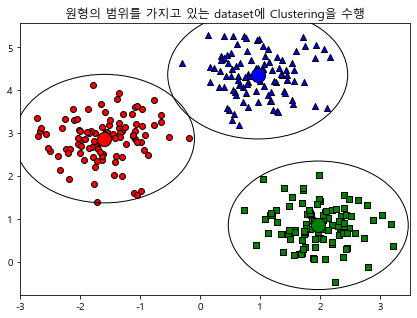

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=.5, random_state=0)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans_cluster = kmeans.fit_predict(X)
unique_cluster = np.unique(kmeans_cluster)
centers = kmeans.cluster_centers_
markers=['o','s','^']
colors =['r','g','b']

figure = plt.subplots(figsize=(7, 5))
for label in unique_cluster:
    label_clusters = np.where(kmeans_cluster==label)
    center_x_y = centers[label]
    plt.scatter(x= X[label_clusters][:,0], y= X[label_clusters][:,1], edgecolor='k', marker=markers[label], color=colors[label])
    plt.scatter(x= center_x_y[0], y= center_x_y[1], s=200, color=colors[label], edgecolor='k')
    
    draw_circle = plt.Circle((center_x_y[0], center_x_y[1]), 1.5,fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    
plt.title('원형의 범위를 가지고 있는 dataset에 Clustering을 수행')
plt.show()

- KMeans 군집화는 개별 군집의 중심에서 원형의 범위를 가지고 있는 자료에 매우 강력하다.
- 하지만 데이터가 원형의 범위가 아닌 특히 데이터의 범위가 길쭉한 타원의 형태인 경우에 군집화를 잘 수행하지 못함
> 군집화를 시각화하는 함수 생성

In [66]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수 ###
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    plt.figure(figsize=(8,5))
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    unique_labels= np.unique(dataframe[label_name].values)
    markers= ['o','s','^','x','*']
    isNoise= False
    
    for label in unique_labels:
        label_cluster= dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend= 'Noise'
            isNoise= True
        else:
            cluster_legend = 'Cluster' + str(label)
        
        plt.scatter(x= label_cluster['ftr1'], y= label_cluster['ftr2'], s=70,
                    edgecolor='k', marker= markers[label], label= cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x= center_x_y[0], y= center_x_y[1], s= 250, color= 'white',
                        alpha= 0.9, edgecolor= 'k', marker= markers[label])
            plt.scatter(x= center_x_y[0], y= center_x_y[1], s= 70, color= 'k',
                        edgecolor= 'k', marker='$%d$' % label)
    if isNoise:
        legend_loc= 'upper center'
    else: legend_loc= 'upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

- visualize_cluster_plot( ) 함수의 인자
    - clusterobj: 사이킷런 군집 수행 객체. KMeans나 GaussianMixture의 fit( )와 predict( )로 군집화를 완료한 객체.  
    만약 군집화 결과 시각화가 아니고 make_blobs( )로 생성한 데이터의 시각화일경우 None 입력
    - dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame
    - label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs( )결과 시각화일 경우는 dataframe 내의 target 컬럼명
    - iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

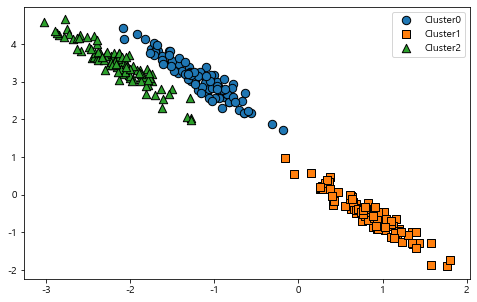

In [67]:
from sklearn.datasets import make_blobs

# make_blobs( )로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5로 만듦
X, y = make_blobs(n_samples= 300, n_features= 2, centers= 3, cluster_std= 0.5, random_state= 0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어지게 됨
> KMeans가 위의 데이터 세트를 어떻게 군집화하는지 확인

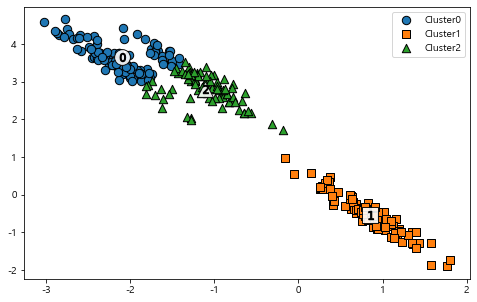

In [69]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label= kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']= kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음
- KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 제대로 분류하지 못하는 오류 발생
> GMM으로 타원형의 데이터의 군집화 수행

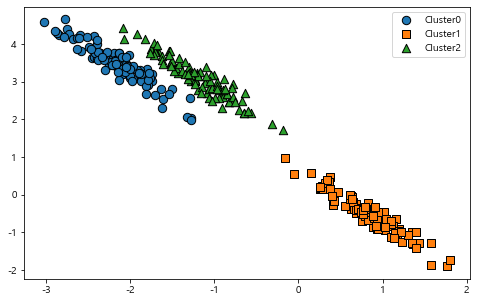

In [70]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm= GaussianMixture(n_components=3, random_state= 0)
gmm_label= gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']= gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [72]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print()
print('### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
